<a href="https://colab.research.google.com/github/debkumarkuila7999/pfsinterns/blob/main/Email_Spam_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Email Spam Detection Model

#Importing Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Data Upload & Loading

Upload Data File

In [2]:
# Load dataset using Google Colab file uploader
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


Load and Display the Dataset




In [5]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('spam.csv', encoding='latin-1')

# Check for missing values and drop unnecessary columns
df = df[['v1', 'v2']]  # We are only interested in 'v1' (label) and 'v2' (message)
df.columns = ['label', 'message']  # Rename columns for clarity

# Preview the dataset
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


#Exploratory Data Analysis (EDA)

Data Distribution

<ipython-input-6-6c4c72ce6582>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


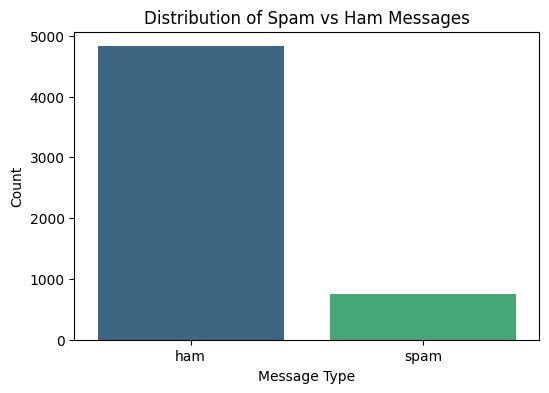

In [6]:
# Plot the distribution of spam and ham messages
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Spam vs Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


Word Cloud for Spam and Ham Messages

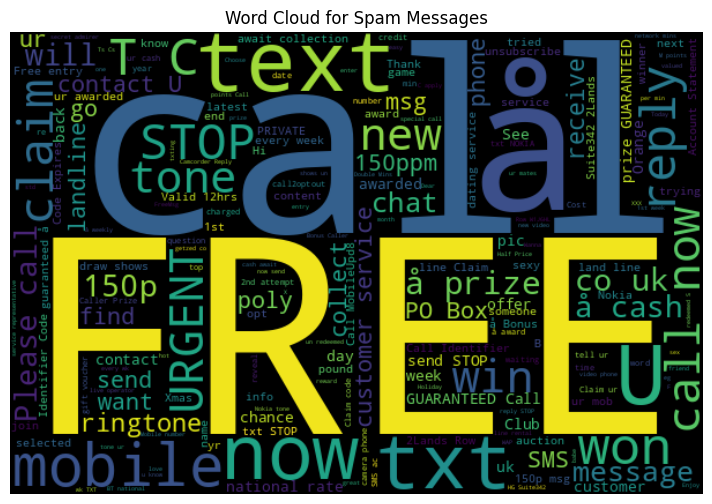

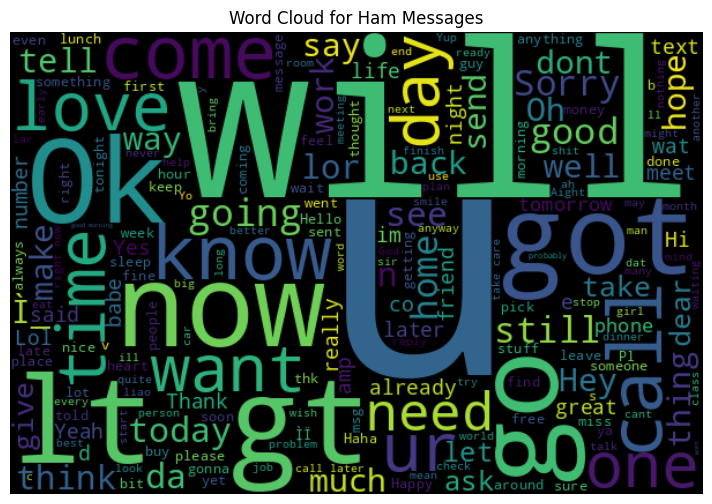

In [7]:
# Create WordCloud for spam and ham messages
spam_words = ' '.join(df[df['label'] == 'spam']['message'])
ham_words = ' '.join(df[df['label'] == 'ham']['message'])

# Spam WordCloud
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
plt.figure(figsize=(10,6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# Ham WordCloud
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)
plt.figure(figsize=(10,6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()


Message Length Analysis

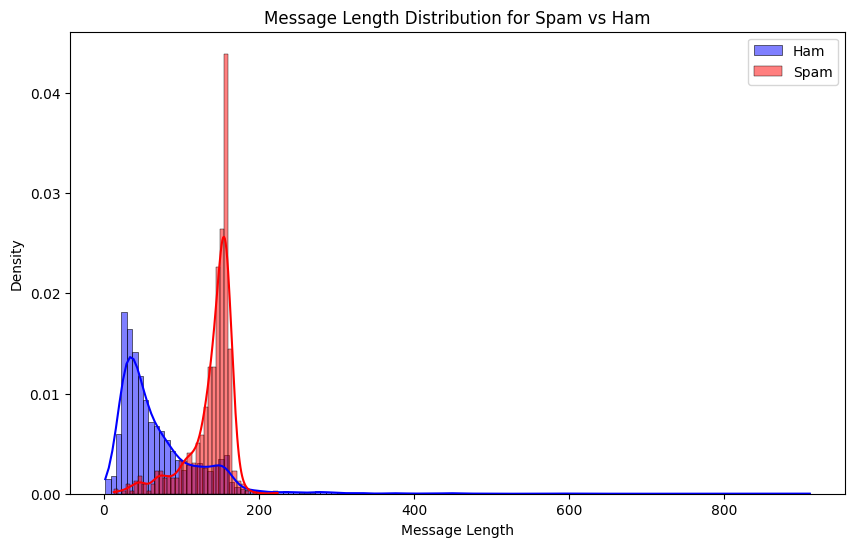

In [8]:
# Add a new column for message length
df['message_length'] = df['message'].apply(len)

# Plot message length distribution for spam and ham
plt.figure(figsize=(10,6))
sns.histplot(data=df[df['label'] == 'ham'], x='message_length', color='blue', label='Ham', kde=True, stat="density")
sns.histplot(data=df[df['label'] == 'spam'], x='message_length', color='red', label='Spam', kde=True, stat="density")
plt.title('Message Length Distribution for Spam vs Ham')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.legend()
plt.show()


# Data Preprocessing

Text Cleaning

In [9]:
# Clean the text data
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()              # Convert to lowercase
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces
    return text

# Apply the cleaning function
df['message'] = df['message'].apply(clean_text)


Label Encoding

In [10]:
# Convert labels into binary values
df['label_numeric'] = df['label'].map({'ham': 0, 'spam': 1})


#Model Building

Train-Test Split

In [11]:
# Split the dataset into training and testing sets
X = df['message']  # Messages
y = df['label_numeric']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Vectorization using Bag of Words (BoW)

In [12]:
# Vectorize the messages
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


Model Training

In [13]:
# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)


MultinomialNB()

#Model Evaluation

In [14]:
# Make predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))


Accuracy: 98.21%
[[959   6]
 [ 14 136]]
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#Saving the Model and Vectorizer

In [15]:
# Save the trained model and vectorizer
with open('spam_detector_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)


#Prediction on New Data

In [16]:
# Load the vectorizer and model
with open('vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

with open('spam_detector_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# New SMS for prediction
input_sms = ["Free entry in a weekly competition to win a brand new car. Call now!"]

# Preprocess the input and predict
input_vectorized = vectorizer.transform(input_sms)
prediction = model.predict(input_vectorized)

# Output the prediction result
if prediction[0] == 1:
    print("This is a SPAM message.")
else:
    print("This is a HAM (non-spam) message.")


This is a SPAM message.
